In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("NonHermitianQW"))))

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from SSH import *


<h1>SSH model</h1>

Hamiltonian of the system:
$$
H =u \sum_{m = 0}^{d-1} \ket{m,A}\bra{m,B} +h.c. + v\sum_{m=0}^{d-2}   \ket{m+1,A}\bra{m,B} +h.c.
$$


In [3]:
G = nx.Graph()
dim = 5

Alist = [str(i) + "A" for i in range(dim)]
Blist = [str(i) + "B" for i in range(dim)]
right_edge_list = [(Alist[i],Blist[i]) for i in range(dim)]
left_edge_list = [(Blist[i],Alist[i+1]) for i in range(dim-1)]
G.add_nodes_from(Alist)
G.add_nodes_from(Blist)
G.add_edges_from(left_edge_list)
G.add_edges_from(right_edge_list)

for edge in right_edge_list:
    G[edge[0]][edge[1]]['weight'] = "u"
for edge in left_edge_list:
    G[edge[0]][edge[1]]['weight'] = "v"

position = {} 
for i in range(dim):
    position[str(i) + "A"] = (2*i,0)
    position[str(i) + "B"] = (2*i+1,0)



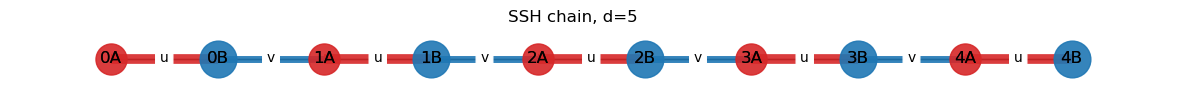

In [4]:

fig = plt.figure(figsize = (15,1))
fig.suptitle(f"SSH chain, d={dim}")
ax = fig.add_subplot()
nx.draw(G=G,pos = position,with_labels = True,nodelist = Alist,node_color = "tab:red",ax=ax,alpha = 0.9,node_size = 500)
nx.draw(G=G,pos = position,with_labels = True,nodelist = Blist,node_color = "tab:blue",ax = ax,alpha = 0.9,node_size = 700)
nx.draw_networkx_edges(G=G,pos = position,edgelist=right_edge_list,edge_color = "tab:red",ax=ax,alpha = 0.9,width = 7)
nx.draw_networkx_edges(G=G,pos = position,edgelist=left_edge_list,edge_color = "tab:blue",ax=ax,alpha = 0.9,width = 5)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G=G, pos=position, edge_labels=edge_labels, ax=ax,label_pos = 0.5)
plt.show()

<h1>SSH with periodic boundary conditions : bulk</h1>

If we impose periodic boundary conditions, one can find the simplified version of the Hamiltonian
$$
H =u \sum_{m = 0}^{d-1} \ket{m,A}\bra{m,B} +h.c. + v\sum_{m=0}^{d-1}   \ket{m+1,A}\bra{m,B} +h.c.
$$
due to it's translational symmetry. It is easy to show, that:
$$
T^{\dag}HT = H
$$
where:
$$
T = \sum_{m = 0} ^{d-1} \ket{m+1}\bra{m} \otimes I_{2}
$$


Therefore we can use Fourier basis to diagonalize this Hamiltonian:
$$
\ket{k_{j}} = \frac{1}{\sqrt{d}}\sum_{m=0}^{d-1} e^{ik_{j}m}\ket{m}
$$
where $k_{j} = 2 \pi j/d$.
$$
H = \sum_{m}\sum_{j}\sum_{j'}\frac{1}{d} (ue^{i(k_{j} - k_{j'})m}\ket{k_{j},A}\bra{k_{j'},B}+h.c. + ve^{ik_{j}}e^{i(k_{j} - k_{j'})m}\ket{k_{j},A}\bra{k_{j'},B} + h.c. ) =
$$
$$
=\sum_{j} \ket{k_{j}}\bra{k_{j}}\otimes \left(\begin{array}{cc} 0 & u+ve^{-ik_{j}}\\ u+ve^{ik_{j}} & 0 \end{array}\right) = \sum_{j} \ket{k_{j}}\bra{k_{j}}\otimes \Big[d_{x}(k_{j})\sigma_{x} + d_{y}(k_{j})\sigma_{y}\Big]
$$
where:
$$
\begin{array}{c}
d_{x}(k) = u + v\cos(k) \\
\\
d_{y}(k) = v\sin(k)
\end{array}
$$
Therefore eigenvectors of the effective Hamiltonian can be represented as a circle on $x,y$ plane of radius $v$, shifted along $x$ axis by value $u$.

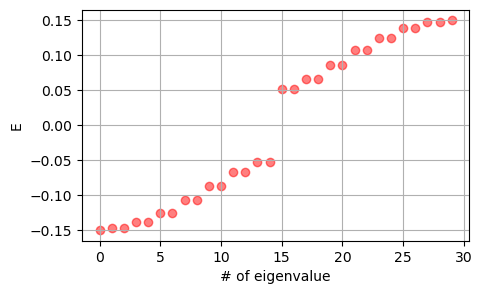

In [6]:
ssh = BulkSSH(15,**{
    "u" : 0.05,
    "v" : 0.1
})

E = np.sort(ssh.get_eigen())
fig = plt.figure(figsize = (5,3))
ax = fig.add_subplot()
ax.scatter(range(len(E)),E,color = "red",alpha = 0.5)
ax.set_xlabel("# of eigenvalue")
ax.set_ylabel("E")
ax.grid(True)
plt.show()

Below, there is a graphical representation of Hamiltonian. One can easly spot the block-diagonal structure of it.

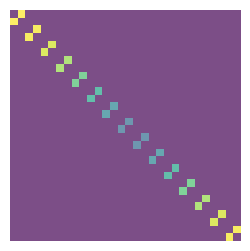

In [7]:
Hk = ssh.get_momentum()

fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot()
ax.imshow(np.abs(Hk),alpha = 0.7)
ax.axis('off')
plt.show()

In [8]:
def plot_Energy(ax,x_,E,u,v):
    ax.grid(True)
    ax.scatter(x_,E[0],alpha = 0.5,color = "blue")
    ax.scatter(x_,E[1],alpha = 0.5,color = "red")
    ax.set_xlabel("k")
    ax.set_ylabel(r"$E_{k}$")
    ax.set_title(f"u: {u}, v:{v}")

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


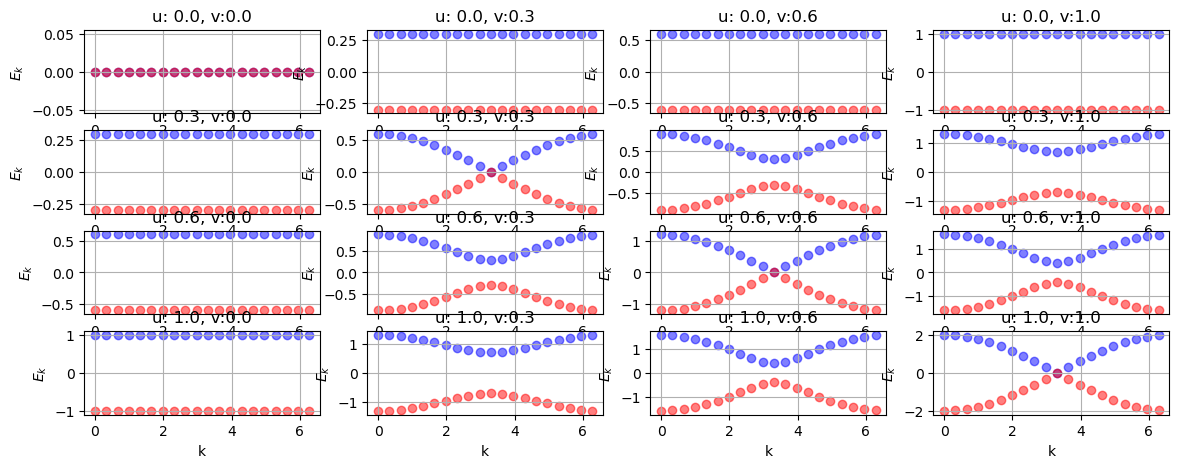

In [9]:
u_tab = [0. , 0.3, 0.6, 1.]
lenu = len(u_tab)
v_tab = [0. , 0.3, 0.6, 1.]
lenv = len(v_tab)

fig = plt.figure(figsize = (14,5))

for i in range(lenu):
    for j in range(lenv):
        ax = fig.add_subplot(lenu,lenv,(i*lenu) + j+1)
        ssh = BulkSSH(20,**{"u" : u_tab[i],"v" : v_tab[j]})
        E = ssh.get_eigen_momentum()
        x_ = np.linspace(0,2*np.pi,E.shape[1])
        plot_Energy(ax,x_,E,u_tab[i],v_tab[j])

plt.show()

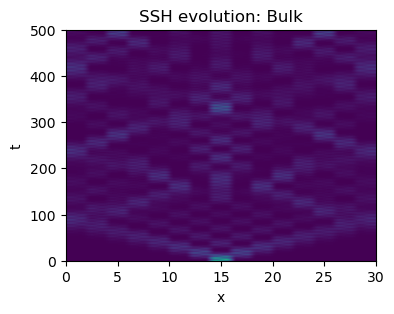

In [10]:
dim = 15
ssh = BulkSSH(dim,**{"u" : 1,"v" : 0.1})
psi = np.zeros(2*dim)
psi[dim] = 1.
T = 500
data = ssh.Evolution(psi,T,dt = 0.1)
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot()
ax.imshow(data,aspect = 'auto',origin="lower",extent = [0,2*dim,0,500])
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_title("SSH evolution: Bulk")
plt.show()


In [11]:
u,v,sd = ssh.spectrum_dependencies()

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


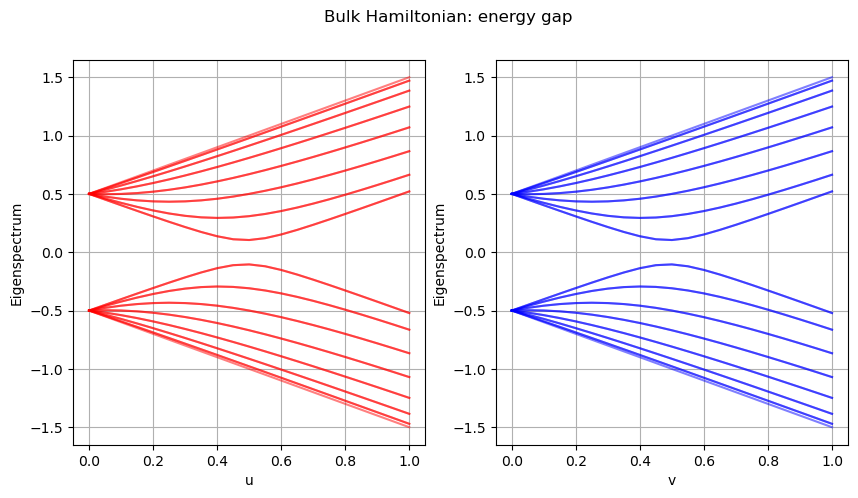

In [12]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.suptitle("Bulk Hamiltonian: energy gap")

for k in range(sd.shape[0]):
    ax.plot(u,sd[k,:,10],color = "red",alpha = 0.5)
    ax2.plot(u,sd[k,10,:],color = "blue",alpha = 0.5)
ax.set_xlabel("u")
ax.set_ylabel("Eigenspectrum")
ax.grid(True)

ax2.set_xlabel("v")
ax2.set_ylabel("Eigenspectrum")
ax2.grid(True)
plt.show()

<h2>Chiral symmetry</h2>

We say that the Hamiltonian aquires Chiral symmetry if there exists unitary operatror $C$, such that:
$$
C^{\dag}H C = -H
$$
for $C$ hermitian and block-diagonal (it's the so called locality condition).

If the above is true, then for each eigenvector $\ket{\psi}$ of the original Hamiltonian:
$$
H\ket{\psi} = E\ket{\psi}
$$
$$
-H\ket{\psi} = -E\ket{\psi} = C^{\dag} HC\ket{\psi}
$$
$$
H(C\ket{\psi}) = - E (C\ket{\psi})
$$
which means that the state $C\ket{\psi}$ is another eigenvector, but with eigenvalue $-E$.

Therefore, if the Hamiltonian aquires chiral symmetry, then its eigenvalues can be grouped in pairs $E,-E$  with corrensponding eigenvectors $\ket{\psi},C\ket{\psi}$.

<h2>Chiral symmetry in SSH</h2>

We can define two projectors: 
$$
\Pi_{A/B} = \sum_{m=0}^{d-1}\ket{m,A/B}\bra{m,A/B}
$$
and operator:
$$
C = \Pi_{A} - \Pi_{B} = I\otimes \sigma_{z}
$$
Let's calculate:
$$
C^{\dag} H C = \Pi_{A} H \Pi_{A} + \Pi_{B} H \Pi_{B}  - \Pi_{A} H \Pi_{B} -\Pi_{B} H \Pi_{A}  =  - \Pi_{A} H \Pi_{B} -\Pi_{B} H \Pi_{A} 
$$

$$
\Pi_{A}( u \sum_{m = 0}^{d-1} \ket{m,A}\bra{m,B} +h.c. + v\sum_{m=0}^{d-2}   \ket{m+1,A}\bra{m,B} +h.c.) \Pi_{B} = u \sum_{m = 0}^{d-1} \ket{m,A}\bra{m,B} +
\sum_{m,n,n'}\delta_{n,m+1}\delta_{n',m} \ket{n,A}\bra{n',B} = ( u \sum_{m = 0}^{d-1} \ket{m,A}\bra{m,B} + v\sum_{m=0}^{d-2}   \ket{m+1,A}\bra{m,B} )
$$
So indeed:
$$
C^{\dag} HC = -H
$$

There is also another issue: 
- If $E \neq 0 $, then $\ket{\psi}$ and $C\ket{\psi}$ are orthogonal, because they correspond to two different eigenvalues of hermitian operator, therefore: $$\bra{\psi} C\ket{\psi} = 0 = \bra{\psi} (\Pi_{A} - \Pi_{B}) \ket{\psi} $$the occupation of $A$ sublattice is the same as for the $B$ sublattice.
- If $E = 0 $, then using formula $\Pi_{A} + \Pi_{B} = I$, we can find, that for each zero-energy eigenstate $\ket{\psi}$, projected state $\Pi_{A/B}\ket{\psi}$ is also zero-energy eigenstate: $$H\Pi_{A/B} \ket{\psi} = \frac{1}{2}H(I\pm C) \ket{\psi} = \frac{1}{2} (E \mp E) \ket{\psi} = 0 $$ So we can always find inside this degenerate eigenspace, the basis that is either localized on sublattice $A$ or on sublattice $B$.

<h2>Winding number</h2>

Bulk Hamiltonian can be diagonalized by momentum eigenbasis. In addition to the ciral symmetry it implies that:
$$
\sigma_{z}H(k)\sigma_{z} = -H 
$$
$$
\sigma_{z}\vec{d}(k) \cdot \vec{\sigma} \sigma_{z}= d_{z}\sigma_{z} -  d_{y}\sigma_{y} - d_{x}\sigma_{x}   = -H(k) =-d_{z}\sigma_{z} -  d_{y}\sigma_{y} - d_{x}\sigma_{x} 
$$
therefore 
$$
d_{z}(k) = 0
$$
because $H(k)$ has to be periodic in momentum, then the loop generated by $H(k)$ eigenvectors forms a closed path on $x,y$ plane. Winding number is weel defined in this case and it corrensponds to the number of cirlces drawn arond the origin for this loop as $k$ is changed throughout Brillouin zone.

Winding number was calculated using formula written below:
$$
W_{0/1} = \frac{1}{\pi}\arg(\prod_{j = 0}^{d-1} \bra{k_{j},c_{0/1}(k_{j})}\ket{k_{j+1},c_{0/1}(k_{j+1})}) 
$$

In [13]:
u = np.arange(0,1,0.01)
v = np.arange(0,1,0.01)
dim = 10

U,V = np.meshgrid(u,v)

get_wn = np.vectorize(lambda x,y : BulkSSH(dim,**{"u" : x, "v" : y}).calc_winding_num(0))

tab = get_wn(U,V)

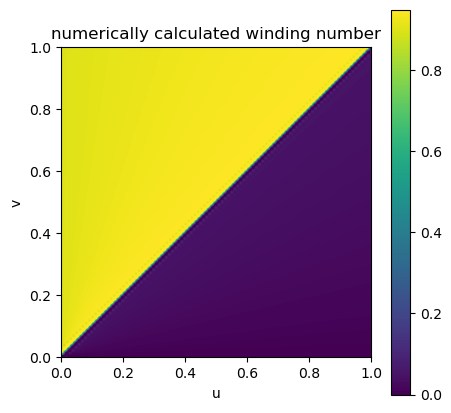

In [14]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot()
wn_plot = ax.imshow(tab,origin="lower",interpolation="spline36",extent=[0,1,0,1])
plt.colorbar(wn_plot,ax = ax)
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_title("numerically calculated winding number")
plt.show()

We can see that for $u>v$, the winding number is $0$. It completely reasonable, because in this case the circle generated by $\vec{d}(k)$ doesn't contain the origin inside itself.

If we want transform continously the Hamiltonian to obtain one solution insted of the other, we have only two options:
- Either we  have to brake the Chiral symmetry by lifting up the circle and moving it above the origin - $d_{z}(k)$ is no longer $0$
- Or we have to move the circle throug the origin, and by doing this we are closing the energy gap. 

Therefore if we define the adiabatic transformation as the transformation which is:
- Continous in time
- All symmetries of the system remains valid
- It doesn't close the energy gap
then we can formulate the equivalence between Hamiltonians.

**Winding number cannot be changed by an adiabatic transformation** therefore it is called topological invariant.

<h1>SSH with broken translational symmetry</h1>

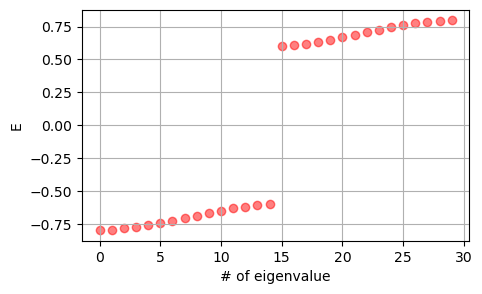

In [15]:
ssh = BoundSSH(15,**{
    "u" : 0.7,
    "v" : 0.1
})

E = np.sort(ssh.get_eigen())
fig = plt.figure(figsize = (5,3))
plt.scatter(range(len(E)),E,color = "red",alpha = 0.5)
plt.xlabel("# of eigenvalue")
plt.ylabel("E")
plt.grid(True)
plt.show()

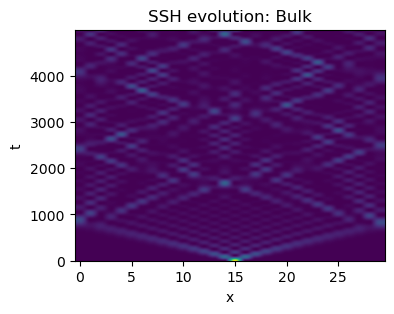

In [16]:
dim = 15
ssh = BoundSSH(dim,**{"u" : 0.1,"v" : 0.1})
psi = np.zeros(2*dim)
psi[dim] = 1.
T = 500
data = ssh.Evolution(psi,T,dt = 0.1)
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot()
ax.imshow(data,aspect = 'auto',origin="lower")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_title("SSH evolution: Bulk")
plt.show()

In [17]:
u,v,sd = ssh.spectrum_dependencies()

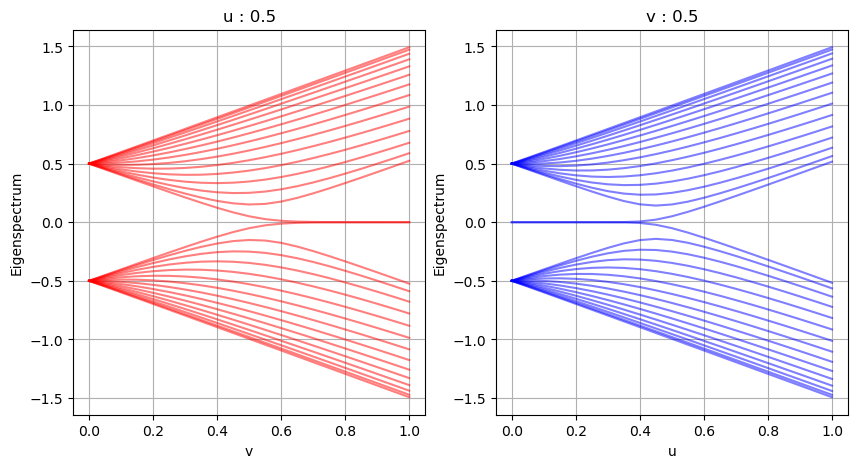

In [18]:
%matplotlib inline


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


for k in range(sd.shape[0]):
    ax.plot(u,sd[k,:,10],color = "red",alpha = 0.5)
    ax2.plot(u,sd[k,10,:],color = "blue",alpha = 0.5)
ax.set_xlabel("v")
ax.set_ylabel("Eigenspectrum")
ax.set_title(f"u : {u[10]}")
ax.grid(True)

ax2.set_xlabel("u")
ax2.set_ylabel("Eigenspectrum")
ax2.set_title(f"v : {v[10]}")
ax2.grid(True)
plt.show()

By looking at the eigenspectrum, we can easily spot, that in the case of topological order $u<v$, where the bulk winding number is equal to $1$, there exist two degenerate zero-energy eigenstates. The analysis of eigenstates corresponding to these eigenvalues is presented below:

In [19]:
import matplotlib.gridspec as gs

In [36]:
def Generate_plots(fig,gs,u_iter,u,v_num,v,sd,dim):
    ssh = BoundSSH(dim,**{"u" : u[u_iter], "v" : v[v_num]})
    E,U = np.linalg.eig(ssh.H_)
    indsE = np.argsort(np.abs(E))
    E = E[indsE]
    U = U[:,indsE]
    inds = [0,1]
    ax_disp = fig.add_subplot(gs[2*u_iter,:])
    for k in range(sd.shape[0]):
        ax_disp.plot(u,sd[k,v_num,:],color = "blue",alpha = 0.7)
    ax_disp.scatter(np.zeros(len(E[inds]))+ u[u_iter],E[inds],color = "red")
    ax_disp.grid(True)
    ax_vec1 = fig.add_subplot(gs[2*u_iter+1,0])
    ax_vec1.bar(range(U.shape[0]),U[:,np.min(inds)],alpha = 0.6,color = "orange")
    ax_vec1.grid(True)
    ax_vec1.set_xlabel("position")
    ax_vec1.set_ylabel("value")
    ax_vec2 = fig.add_subplot(gs[2*u_iter+1,1])
    ax_vec2.bar(range(U.shape[0]),U[:,np.max(inds)],alpha = 0.6,color = "orange")
    ax_vec2.grid(True)
    ax_vec2.set_xlabel("position")
    ax_vec2.set_ylabel("value")

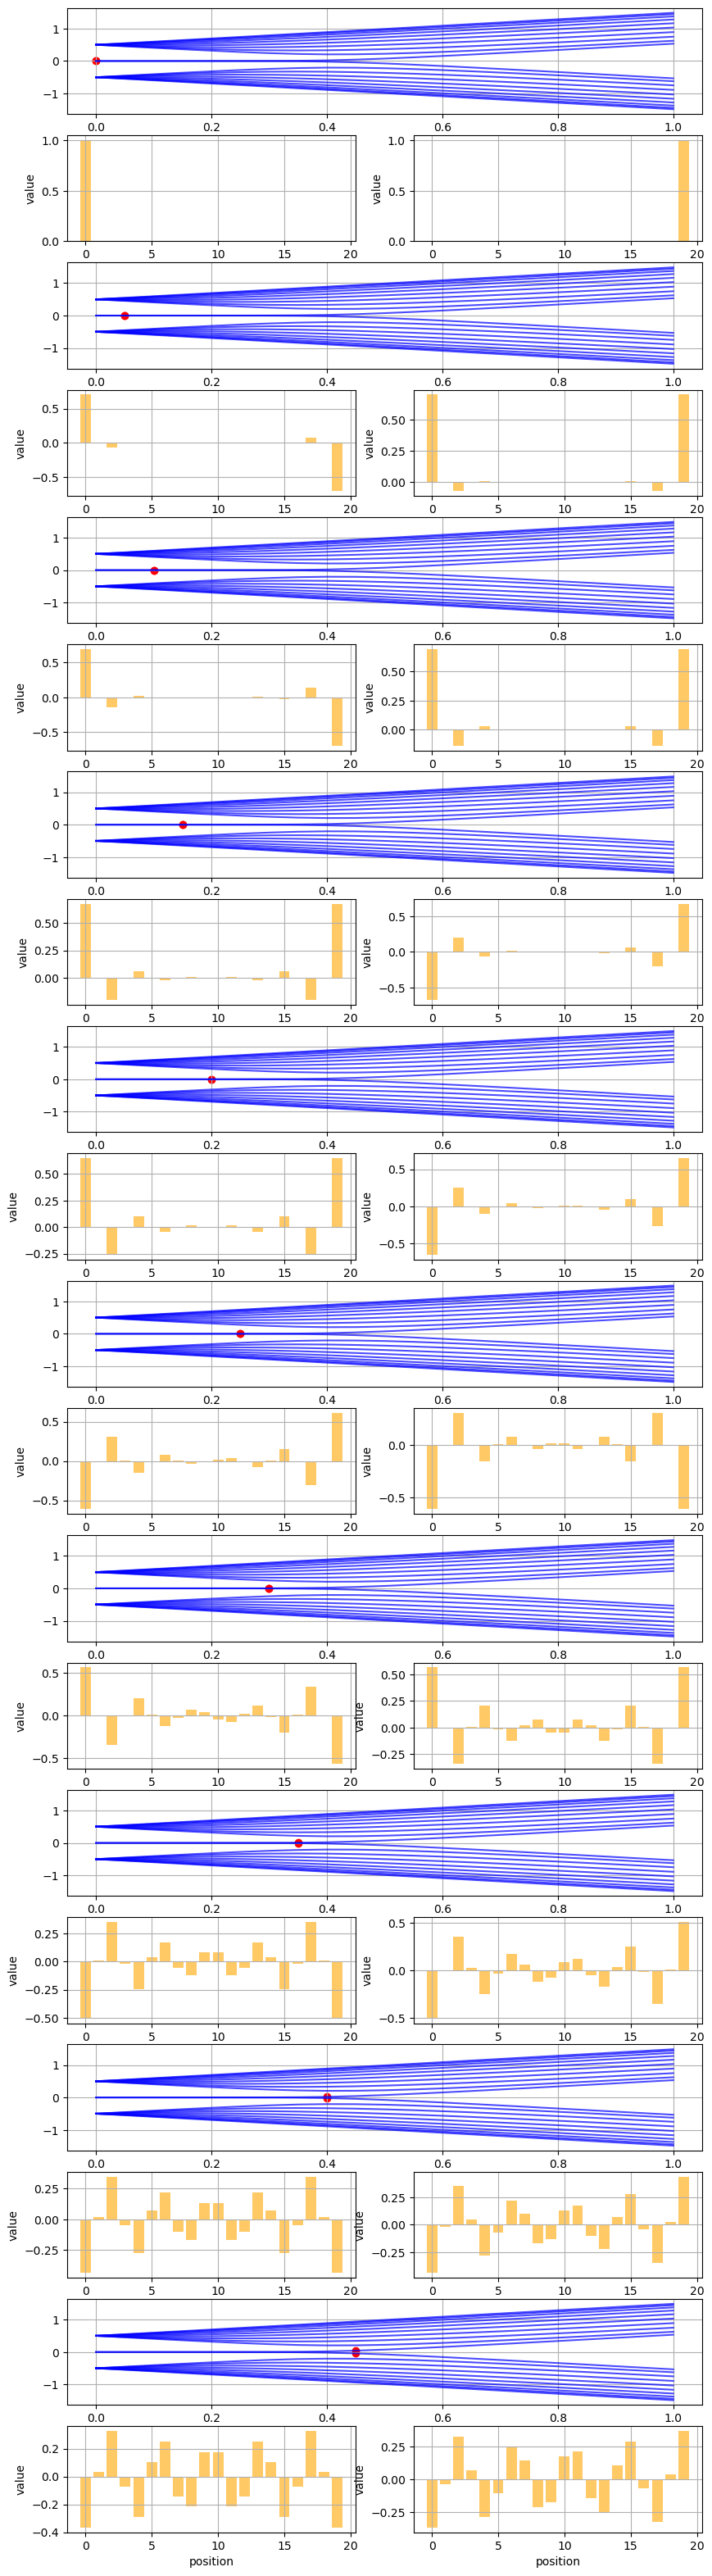

In [40]:
dim = 10
ssh = BoundSSH(dim)
u,v,sd = ssh.spectrum_dependencies()

cells = len(u)//2
fig = plt.figure(figsize = (10,4*cells))
gsg = gs.GridSpec(2*cells,2,figure = fig)
for i in range(cells):
    Generate_plots(fig,gsg,i,u,10,v,sd,dim)